In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('heart[1].csv')

In [3]:
df1=df.copy()

In [4]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le=LabelEncoder()

In [7]:
x=df1.drop(['ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1)

In [11]:
x

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,1,140,289,0,172,0.0,0
1,49,0,160,180,0,156,1.0,1
2,37,1,130,283,0,98,0.0,0
3,48,0,138,214,0,108,1.5,1
4,54,1,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,1.2,1
914,68,1,144,193,1,141,3.4,1
915,57,1,130,131,0,115,1.2,1
916,57,0,130,236,0,174,0.0,1


In [9]:
a=le.fit_transform(x['Sex'])

In [10]:
x['Sex']=a

In [13]:
x.drop('HeartDisease',1)

C:\Users\aftha\AppData\Local\Temp\ipykernel_2368\1516373224.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x.drop('HeartDisease',1)


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,1,140,289,0,172,0.0
1,49,0,160,180,0,156,1.0
2,37,1,130,283,0,98,0.0
3,48,0,138,214,0,108,1.5
4,54,1,150,195,0,122,0.0
...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,1.2
914,68,1,144,193,1,141,3.4
915,57,1,130,131,0,115,1.2
916,57,0,130,236,0,174,0.0


In [14]:
y=df1['HeartDisease']

In [15]:
from sklearn.model_selection import train_test_split

In [29]:
svc_l=SVC(kernel='linear')

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1)

In [31]:
svc_l.fit(xtrain,ytrain)

SVC(kernel='linear')

In [32]:
svc_l.score(xtest,ytest)

1.0

In [33]:
y_act=ytest
y_pred=svc_l.predict(xtest)
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_act,y_pred)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

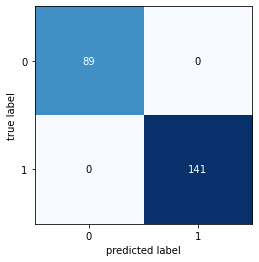

In [36]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cf)

In [37]:
svc_p=SVC(kernel='poly')

In [38]:
svc_p.fit(xtrain,ytrain)

SVC(kernel='poly')

In [45]:
svc_p.score(xtest,ytest)

0.7260869565217392

In [43]:
y_act=ytest
y_pred=svc_p.predict(xtest)
cf=confusion_matrix(y_act,y_pred)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

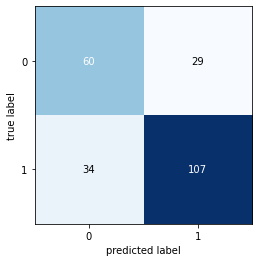

In [44]:
plot_confusion_matrix(cf)

In [40]:
svc=SVC()

In [41]:
svc.fit(xtrain,ytrain)

SVC()

In [42]:
svc.score(xtest,ytest)

0.7086956521739131